# 🎯 **Use Case: Predicting Crop Production**

> *Objective:*
- Estimate the total production (in tons) of a specific crop for a given region and year.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestRegressor

In [2]:
cpp = pd.read_csv("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/DataSet/Cleaned_Corp_Production_Prediction_DataSet.csv")
cpp.head()

,Country,Item,Year,Area harvested (ha),Yield (kg/ha),Production (t)
0,Afghanistan,"Almonds, in shell",2019,29203.0,1308.3,38205.0
1,Afghanistan,"Almonds, in shell",2020,22134.0,1775.9,39307.0
2,Afghanistan,"Almonds, in shell",2021,36862.0,1743.2,64256.0
3,Afghanistan,"Almonds, in shell",2022,36462.0,1742.0,63515.0
4,Afghanistan,"Almonds, in shell",2023,37000.0,1810.8,67000.0


- **Encoder:**

In [3]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for column in cpp:
    le = LabelEncoder()
    encoders[column] = le
    cpp[column] = le.fit_transform(cpp[column])

In [4]:
encoders

{'Country': LabelEncoder(),
 'Item': LabelEncoder(),
 'Year': LabelEncoder(),
 'Area harvested (ha)': LabelEncoder(),
 'Yield (kg/ha)': LabelEncoder(),
 'Production (t)': LabelEncoder()}

- **Saving the encoder.pkl file:**

In [63]:
import pickle
with open ("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/model/encoder.pkl", "wb") as f:
    pickle.dump(encoders,f)

In [6]:
cpp

,Country,Item,Year,Area harvested (ha),Yield (kg/ha),Production (t)
0,0,2,0,11372,5930,36376
1,0,2,1,10195,7738,36595
2,0,2,2,12288,7617,40439
3,0,2,3,12237,7615,40356
4,0,2,4,12309,7857,40797
...,...,...,...,...,...,...
92417,199,261,0,23,1334,738
92418,199,261,1,23,1367,742
92419,199,261,2,23,1350,741
92420,199,261,3,23,1352,740


- ***Define features and target***

In [7]:
x = cpp.drop(['Production (t)'], axis=1)
x

,Country,Item,Year,Area harvested (ha),Yield (kg/ha)
0,0,2,0,11372,5930
1,0,2,1,10195,7738
2,0,2,2,12288,7617
3,0,2,3,12237,7615
4,0,2,4,12309,7857
...,...,...,...,...,...
92417,199,261,0,23,1334
92418,199,261,1,23,1367
92419,199,261,2,23,1350
92420,199,261,3,23,1352


In [8]:
#Target
y = cpp['Production (t)']
y

0        36376
1        36595
2        40439
3        40356
4        40797
         ...  
92417      738
92418      742
92419      741
92420      740
92421      741
Name: Production (t), Length: 92422, dtype: int64

In [9]:
x.shape, y.shape

((92422, 5), (92422,))

- ***Model Training: Train/test split***

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test_lr = train_test_split(x,y,test_size= 0.2, random_state= 5)

In [11]:
x_train.shape,x_test.shape,y_train.shape,y_test_lr.shape

((73937, 5), (18485, 5), (73937,), (18485,))

In [12]:
x_train

,Country,Item,Year,Area harvested (ha),Yield (kg/ha)
80063,173,259,0,2797,16575
18250,38,20,3,19659,8720
79314,172,15,2,2797,16575
82302,178,39,1,2797,16575
80694,174,158,0,4005,13068
...,...,...,...,...,...
59465,127,233,3,2797,16575
5520,11,128,4,2797,16575
20463,43,221,1,12366,13003
18638,38,248,2,20633,31721


In [13]:
y_train

80063    26456
18250    58126
79314    52681
82302     4342
80694    30104
         ...  
59465    60958
5520      5960
20463    46116
18638    62087
35683    44873
Name: Production (t), Length: 73937, dtype: int64

In [14]:
x_test

,Country,Item,Year,Area harvested (ha),Yield (kg/ha)
46716,97,53,4,683,25590
25027,53,38,0,2797,16575
25802,54,196,4,13997,32049
16102,34,178,0,9358,21720
85799,187,122,3,20858,18168
...,...,...,...,...,...
79428,172,164,3,110,10442
68848,147,39,0,2797,16575
36275,78,213,1,2797,28
65095,140,149,0,2797,16575


In [15]:
y_test_lr

46716    24952
25027    26456
25802    57435
16102    47041
85799    61840
         ...  
79428     6576
68848     6111
36275     2441
65095    14416
24302    45247
Name: Production (t), Length: 18485, dtype: int64

- ***Train Linear Regression Model:***

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [64]:
import pickle
with open ("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/model/linear_model.pkl", "wb") as f:
    pickle.dump(lr,f)

- ***Score:***

In [18]:
score_lr = lr.score(x_test,y_test_lr)
score_lr

0.5257186550946915

- ***Prediction:***

In [19]:
y_prediction_lr = lr.predict(x_test)
y_prediction_lr

array([22388.31170988, 22111.16532251, 60655.91669319, ...,
       13869.02369063, 23963.14215641, 23159.6956413 ], shape=(18485,))

- ***Metrics Evaluation***

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,  r2_score

mae_lr = mean_absolute_error(y_test_lr,y_prediction_lr)
mse_lr = mean_squared_error(y_test_lr,y_prediction_lr)
r2_lr =  r2_score(y_test_lr,y_prediction_lr)

print("Linear Regression Metrics Details:\n")
print(f"MAE: {mae_lr},\nMSE: {mse_lr},\nR2_score: {r2_lr}")

Linear Regression Metrics Details:

MAE: 8994.291731466195,
MSE: 148254200.12305936,
R2_score: 0.5257186550946915


In [21]:
Country = 'Afghanistan'
Item = 'Almonds, in shell'
Year = 2019
Area_harvested = 29203.0
Yield =  1308.3

In [22]:
new_data = {
    'Country': Country,
    'Item': Item,
    'Year':Year,
    'Area harvested (ha)':Area_harvested,
    'Yield (kg/ha)':Yield
}

import pandas as pd

new_df = pd.DataFrame([new_data])
new_df

,Country,Item,Year,Area harvested (ha),Yield (kg/ha)
0,Afghanistan,"Almonds, in shell",2019,29203.0,1308.3


In [23]:
categorical_col= new_df.columns
categorical_col

Index(['Country', 'Item', 'Year', 'Area harvested (ha)', 'Yield (kg/ha)'], dtype='object')

In [65]:
with open('C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/model/encoder.pkl','rb') as f:
  encoder = pickle.load(f)

In [66]:
encoder

{'Country': LabelEncoder(),
 'Item': LabelEncoder(),
 'Year': LabelEncoder(),
 'Area harvested (ha)': LabelEncoder(),
 'Yield (kg/ha)': LabelEncoder(),
 'Production (t)': LabelEncoder()}

In [26]:
for col in categorical_col:
    if col in encoders:
        print(f"Processing column: {col}")
        print(f"Original values: {new_df[col].values}")
        
        known_labels = set(encoders[col].classes_)
        print("known_labels",known_labels)
        current_labels = set(new_df[col].unique())
        print("current_labels",current_labels)

        unknown_labels = current_labels - known_labels
        print("unknown_labels\n",unknown_labels)

        if unknown_labels:
            print(f"❌ Unknown labels found in column '{col}': {unknown_labels}")
        else:
            new_df[col] = encoders[col].transform(new_df[col])
            print(f"✅ Transformed values: {new_df[col].values}\n")

Processing column: Country
Original values: ['Afghanistan']
known_labels {'Niue', 'Myanmar', 'Croatia', 'Haiti', 'Chile', 'Netherlands (Kingdom of the)', 'Faroe Islands', 'Equatorial Guinea', 'Peru', 'Oman', 'Poland', 'Sweden', 'Ukraine', 'Lesotho', 'Chad', 'Nicaragua', 'Slovenia', 'Mali', 'Gambia', 'Papua New Guinea', 'Spain', 'United Republic of Tanzania', 'Maldives', 'Hungary', 'Kuwait', 'Guinea', 'Viet Nam', 'Malaysia', 'China, Taiwan Province of', 'Egypt', 'Tonga', 'Democratic Republic of the Congo', 'Micronesia (Federated States of)', 'Lebanon', 'Timor-Leste', "Lao People's Democratic Republic", 'North Macedonia', 'Finland', 'Marshall Islands', 'Panama', 'Algeria', 'Mongolia', 'Central African Republic', 'Syrian Arab Republic', 'Sudan', 'Jamaica', 'Madagascar', 'Tunisia', "Democratic People's Republic of Korea", 'Singapore', 'Kyrgyzstan', 'Republic of Korea', 'Sao Tome and Principe', 'Somalia', 'Luxembourg', 'Suriname', 'Thailand', 'Ethiopia', 'El Salvador', 'Brunei Darussalam', 

In [27]:
new_df

,Country,Item,Year,Area harvested (ha),Yield (kg/ha)
0,0,2,0,11372,5930


In [28]:
with open("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/model/linear_model.pkl", "rb") as f:
    lrr = pickle.load(f)
lrr

LinearRegression()

In [29]:
prediction = lrr.predict(new_df)
print(f"The predicted production for lrr is : {prediction[0]:,.2f} tons")

The predicted production for lrr is : 35,495.67 tons


- **RandomForestRegressor:**

In [30]:
cpp.head()

,Country,Item,Year,Area harvested (ha),Yield (kg/ha),Production (t)
0,0,2,0,11372,5930,36376
1,0,2,1,10195,7738,36595
2,0,2,2,12288,7617,40439
3,0,2,3,12237,7615,40356
4,0,2,4,12309,7857,40797


In [31]:
# 1. Define features and target
x_rfr = cpp[['Country', 'Item', 'Year','Area harvested (ha)','Yield (kg/ha)']]
y_rfr = cpp['Production (t)']

In [32]:
x_rfr

,Country,Item,Year,Area harvested (ha),Yield (kg/ha)
0,0,2,0,11372,5930
1,0,2,1,10195,7738
2,0,2,2,12288,7617
3,0,2,3,12237,7615
4,0,2,4,12309,7857
...,...,...,...,...,...
92417,199,261,0,23,1334
92418,199,261,1,23,1367
92419,199,261,2,23,1350
92420,199,261,3,23,1352


In [33]:
y_rfr

0        36376
1        36595
2        40439
3        40356
4        40797
         ...  
92417      738
92418      742
92419      741
92420      740
92421      741
Name: Production (t), Length: 92422, dtype: int64

In [34]:
# 2. Train/test split
X_train, X_test, y_train, y_test_rfr = train_test_split(x_rfr, y_rfr, test_size=0.2, random_state=42)

In [35]:
X_train

,Country,Item,Year,Area harvested (ha),Yield (kg/ha)
26749,56,200,3,17889,34206
65734,141,91,0,2797,16575
76576,166,103,0,400,5422
26845,56,246,2,6444,9800
69140,147,141,0,2797,16575
...,...,...,...,...,...
6265,13,28,0,2797,16575
54886,115,90,1,487,22148
76820,166,173,2,4564,10808
860,1,118,1,1594,28134


In [36]:
y_train

26749    60868
65734    11892
76576     8347
26845    31733
69140     7289
         ...  
6265       716
54886    20472
76820    29216
860      33025
15795    40854
Name: Production (t), Length: 73937, dtype: int64

In [37]:
X_test

,Country,Item,Year,Area harvested (ha),Yield (kg/ha)
92200,199,188,2,568,19241
65207,140,225,4,8062,11066
71203,151,264,1,10,27976
32440,70,146,0,2797,16575
38423,83,62,1,2797,16575
...,...,...,...,...,...
59806,127,93,0,1,17342
87221,190,62,0,2797,16575
32695,70,203,2,351,17049
61183,131,74,1,2797,16575


In [38]:
y_test_rfr

92200    19871
65207    36406
71203     4571
32440    26456
38423    61286
         ...  
59806      278
87221    49165
32695    15545
61183      379
89864    27368
Name: Production (t), Length: 18485, dtype: int64

In [39]:
# 3. Train model
rfr = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [67]:
import pickle
with open ("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/model/random_Forest_regressor_model.pkl", "wb") as f:
    pickle.dump(rfr,f)

In [41]:
# 4. Score
score_rfr = rfr.score(X_test,y_test_rfr)
score_rfr

0.7052641168065136

In [42]:
# 5. Predict
y_pred_rfr = rfr.predict(X_test)
y_pred_rfr

array([19945.14415679, 36006.09349802,  4663.80922048, ...,
       16731.51378438, 15601.45101912, 27403.03112644], shape=(18485,))

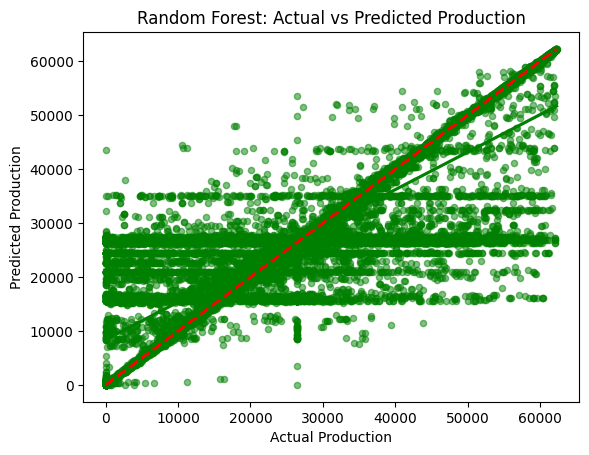

In [43]:
# Plot the actual vs predicted production values to visually assess performance:
sns.regplot(x=y_test_rfr, y=y_pred_rfr, color='Green',scatter_kws={'alpha':0.5, 's':20})

# Add y = x line [predicted = actual] y = mx +c
min_val = min(min(y_test_rfr), min(y_pred_rfr))
max_val = max(max(y_test_rfr), max(y_pred_rfr))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')


plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Random Forest: Actual vs Predicted Production')
plt.show()

The closer the points are to this line, the better the model's predictions are

Points above the line: overprediction

Points below the line: underprediction

In [44]:
#compare actual vs predicted production values
Predicted = pd.DataFrame()
Predicted['Production_test'] = y_test_rfr
Predicted['Production_predicted'] = rfr.predict(X_test)
Predicted.head(10)

,Production_test,Production_predicted
92200,19871,19945.144157
65207,36406,36006.093498
71203,4571,4663.809220
32440,26456,26309.658834
38423,61286,24391.183960
8443,26456,26149.981697
55245,32260,23985.915670
84699,51461,51575.530667
73658,26456,24391.183960
25014,9238,8765.093279


In [69]:
Predicted.to_csv("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/DataSet/production_actual_vs_predicted.csv", index=False)

In [70]:
production_actual_predicted = pd.read_csv("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/DataSet/production_actual_vs_predicted.csv")
production_actual_predicted.head()

,Production_test,Production_predicted
0,19871,19945.144157
1,36406,36006.093498
2,4571,4663.809220
3,26456,26309.658834
4,61286,24391.183960


In [47]:
# Calculate and display R² and RMSE
r2 = r2_score(production_actual_predicted['Production_test'], production_actual_predicted['Production_predicted'])
rmse = np.sqrt(mean_squared_error(production_actual_predicted['Production_test'], production_actual_predicted['Production_predicted']))

print(r2, rmse)


0.7052641168065137 9561.419335016015


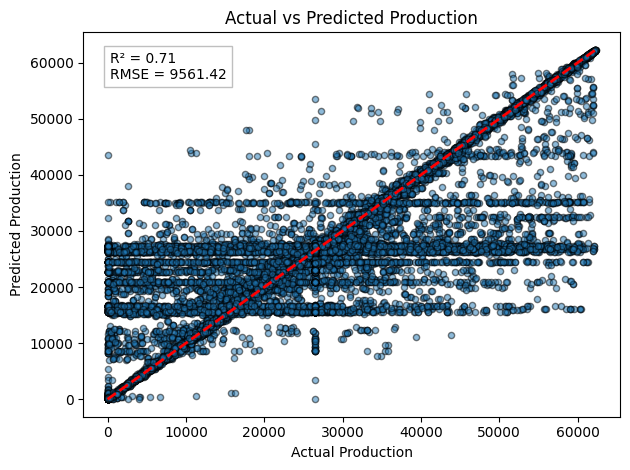

In [48]:
fig, ax = plt.subplots()

ax.scatter(production_actual_predicted['Production_test'],
           production_actual_predicted['Production_predicted'],
           edgecolors='black',alpha=0.5,
           s=20)

ax.set_xlabel('Actual Production')
ax.set_ylabel('Predicted Production')
ax.set_title('Actual vs Predicted Production')


# Add y = x reference line
min_val = min(production_actual_predicted['Production_test'].min(), production_actual_predicted['Production_predicted'].min())
max_val = max(production_actual_predicted['Production_test'].max(), production_actual_predicted['Production_predicted'].max())
ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2) #represents the ideal prediction line — where predicted values equal actual values (i.e., the line  y = x)

ax.text(0.05, 0.95, f'R² = {r2:.2f}\nRMSE = {rmse:.2f}',
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray')   )

plt.tight_layout()
plt.show()

In [49]:
# 6. Evaluate
mae_rfr = mean_absolute_error(y_test_rfr, y_pred_rfr)
mse_rfr = mean_squared_error(y_test_rfr, y_pred_rfr)
r2_rfr = r2_score(y_test_rfr, y_pred_rfr) # R-squared: how well the model explains the variance
rmse_rfr = np.sqrt(mean_squared_error(y_test_rfr, y_pred_rfr)) # Root of the MSE, to bring it back to original units

print("Random Forest Regression:")
print(f'R²: {r2_rfr:.2f}')
print(f'MAE: {mae_rfr:.2f} tons')
print(f'MSE: {mse_rfr:.2f} tons²') 
print(f'RMSE: {rmse_rfr:.2f} tons')

Random Forest Regression:
R²: 0.71
MAE: 5363.36 tons
MSE: 91420739.70 tons²
RMSE: 9561.42 tons


In [50]:
Country = 'Afghanistan'
Item = 'Almonds, in shell'
Year = 2023
Area_harvested = 37000.0
Yield = 1810.8

In [51]:
new_data2 = {
    'Country': Country,
    'Item': Item,
    'Year':Year,
    'Area harvested (ha)':Area_harvested,
    'Yield (kg/ha)':Yield
}

import pandas as pd

new_df2 = pd.DataFrame([new_data2])
new_df2

,Country,Item,Year,Area harvested (ha),Yield (kg/ha)
0,Afghanistan,"Almonds, in shell",2023,37000.0,1810.8


In [68]:
with open("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/model/random_Forest_regressor_model.pkl", "rb") as f:
    rfr = pickle.load(f)
rfr

RandomForestRegressor(max_depth=10, random_state=42)

In [53]:
encoders

{'Country': LabelEncoder(),
 'Item': LabelEncoder(),
 'Year': LabelEncoder(),
 'Area harvested (ha)': LabelEncoder(),
 'Yield (kg/ha)': LabelEncoder(),
 'Production (t)': LabelEncoder()}

In [54]:
sorted(encoders['Country'].classes_)[0]

'Afghanistan'

In [55]:
encoders['Country'].classes_

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan Province of', 'China, mainland', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', "C�te d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea',

In [56]:
sorted(encoders['Item'].classes_)[0]

'Abaca, manila hemp, raw'

In [57]:
encoders['Item'].classes_

array(['Abaca, manila hemp, raw', 'Agave fibres, raw, n.e.c.',
       'Almonds, in shell',
       'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
       'Apples', 'Apricots', 'Areca nuts', 'Artichokes', 'Asparagus',
       'Asses', 'Avocados', 'Bambara beans, dry', 'Bananas', 'Barley',
       'Beans, dry', 'Beer of barley, malted', 'Bees', 'Beeswax',
       'Blueberries', 'Brazil nuts, in shell',
       'Broad beans and horse beans, dry',
       'Broad beans and horse beans, green', 'Buckwheat', 'Buffalo',
       'Buffalo fat, unrendered', 'Butter and ghee of sheep milk',
       'Butter of buffalo milk', 'Butter of cow milk', 'Buttermilk, dry',
       'Cabbages', 'Camels', 'Canary seed',
       'Cantaloupes and other melons', 'Carrots and turnips',
       'Cashew nuts, in shell', 'Cashewapple', 'Cassava, fresh',
       'Castor oil seeds', 'Cattle', 'Cattle fat, unrendered',
       'Cauliflowers and broccoli', 'Cereals n.e.c.',
       'Cheese from milk of bu

In [58]:
encoders['Year'].classes_

array([2019, 2020, 2021, 2022, 2023])

In [59]:
categorical_col= new_df2.columns
categorical_col

Index(['Country', 'Item', 'Year', 'Area harvested (ha)', 'Yield (kg/ha)'], dtype='object')

In [60]:
for col in categorical_col:
    if col in encoders:
        print(f"Processing column: {col}")
        print(f"Original values: {new_df2[col].values}")
        
        known_labels = set(encoders[col].classes_)
        print("known_labels",known_labels)
        current_labels = set(new_df2[col].unique())
        print("current_labels",current_labels)

        unknown_labels = current_labels - known_labels
        print("unknown_labels",unknown_labels)

        if unknown_labels:
            print(f"❌ Unknown labels found in column '{col}': {unknown_labels}")
        else:
            new_df2[col] = encoders[col].transform(new_df2[col])
            print(f"✅ Transformed values: {new_df2[col].values}\n")

Processing column: Country
Original values: ['Afghanistan']
known_labels {'Niue', 'Myanmar', 'Croatia', 'Haiti', 'Chile', 'Netherlands (Kingdom of the)', 'Faroe Islands', 'Equatorial Guinea', 'Peru', 'Oman', 'Poland', 'Sweden', 'Ukraine', 'Lesotho', 'Chad', 'Nicaragua', 'Slovenia', 'Mali', 'Gambia', 'Papua New Guinea', 'Spain', 'United Republic of Tanzania', 'Maldives', 'Hungary', 'Kuwait', 'Guinea', 'Viet Nam', 'Malaysia', 'China, Taiwan Province of', 'Egypt', 'Tonga', 'Democratic Republic of the Congo', 'Micronesia (Federated States of)', 'Lebanon', 'Timor-Leste', "Lao People's Democratic Republic", 'North Macedonia', 'Finland', 'Marshall Islands', 'Panama', 'Algeria', 'Mongolia', 'Central African Republic', 'Syrian Arab Republic', 'Sudan', 'Jamaica', 'Madagascar', 'Tunisia', "Democratic People's Republic of Korea", 'Singapore', 'Kyrgyzstan', 'Republic of Korea', 'Sao Tome and Principe', 'Somalia', 'Luxembourg', 'Suriname', 'Thailand', 'Ethiopia', 'El Salvador', 'Brunei Darussalam', 

In [61]:
prediction = rfr.predict(new_df2)
print(f"The predicted production for rfr is : {prediction[0]:,.2f} tons") 

#, → adds commas as thousand separators
#.2f → rounds the number to 2 decimal places

The predicted production for rfr is : 40,683.75 tons


In [62]:
results = {
    'Model': ['Linear Regression', 'Random Forest'],
    'R2 Score': [r2_score(y_test_lr, y_prediction_lr), r2_score(y_test_rfr, y_pred_rfr)],
    'MAE': [mean_absolute_error(y_test_lr, y_prediction_lr), mean_absolute_error(y_test_rfr, y_pred_rfr)],
    'MSE': [mean_squared_error(y_test_lr, y_prediction_lr), mean_squared_error(y_test_rfr, y_pred_rfr)],
}

import pandas as pd
results_df = pd.DataFrame(results)
results_df

,Model,R2 Score,MAE,MSE
0,Linear Regression,0.525719,8994.291731,1.482542e+08
1,Random Forest,0.705264,5363.357103,9.142074e+07


- Saving the pkl file in joblib to deploy in cloud purpose:

In [74]:
from joblib import dump
from joblib import load
import pickle

In [76]:
# Load encoders
with open('C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/model/encoder.pkl', 'rb') as f:
    e = pickle.load(f)

# Save it using joblib with compression
dump(e, "C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/model/encoder.joblib", compress=3)

encoders = load("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/model/encoder.joblib")

In [81]:
# Load random_Forest_regressor_model
with open("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/model/random_Forest_regressor_model.pkl", "rb") as f:
    r = pickle.load(f)

# Save it using joblib with compression
dump(r, "C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/model/random_Forest_regressor_model.joblib", compress=3)

rfr = load("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/model/random_Forest_regressor_model.joblib")

In [ ]:
# Load linear_regression_model
with open("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/model/linear_model.pkl", "rb") as f:
    l = pickle.load(f)

# Save it using joblib with compression
dump(l, "C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/model/linear_model.joblib", compress=3)

lr = load("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project3/Crop_Production_Prediction/model/linear_model.joblib")